<a href="https://colab.research.google.com/github/saif-se92/Ethereum_price_forcast/blob/main/Eth_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eth/Usd Price Forecasting

### 1. Data Collection & Preparation:

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import pickle

In [2]:
# load the datset
df = pd.read_csv('/content/ETH-USD.csv',parse_dates=["Date"],index_col=["Date"])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1598 entries, 2017-11-09 to 2022-03-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1598 non-null   float64
 1   High       1598 non-null   float64
 2   Low        1598 non-null   float64
 3   Close      1598 non-null   float64
 4   Adj Close  1598 non-null   float64
 5   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 87.4 KB


In [4]:
# Statistical Summary
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03
mean,1026.060794,1061.282123,986.461636,1027.554834,1027.554834,1.245347e+10
std,1230.979724,1270.582395,1185.384747,1231.398723,1231.398723,1.121937e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,196.428421,201.416004,188.846440,196.605812,196.605812,3.154440e+09
50%,386.373398,396.498703,375.446228,386.445556,386.445556,9.525409e+09
75%,1647.892822,1721.577515,1568.554352,1659.367554,1659.367554,1.764118e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [5]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


### 2. Exploratory Data Analysis (EDA)

In [6]:
# draw a line plot in plotly
fig = px.line(df, x=df.index, y='Close', title='ETH Closing Price Over Time')
fig.show()

In [7]:
df['Rolling_Mean_30'] = df['Close'].rolling(window=30).mean()


In [8]:
# draw line plot in plotly
fig = px.line(df, x=df.index, y=['Close', 'Rolling_Mean_30'], title='ETH Closing Price Over Time')
fig.show()

In [9]:
# draw same plot in plotly
fig = px.line(df, x=df.index, y='Volume', title='ETH Trading Volume Over Time')
fig.show()

### 3. Stationarity Testing:

In [10]:

def test_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("Series is likely stationary.")
    else:
        print("Series is likely non-stationary.")

test_stationarity(df['Close'])

ADF Statistic: -0.5659701444521514
p-value: 0.8784874888649452
Series is likely non-stationary.


In [11]:
df['Close_diff'] =df['Close'].diff().dropna()
test_stationarity(df['Close_diff'].dropna())

ADF Statistic: -10.24822770817513
p-value: 4.557682002400704e-18
Series is likely stationary.


In [12]:
# plotting the difference close Prices
fig = px.line(df, x=df.index, y='Close_diff', title='ETH Closing Price Over Time')
fig.show()

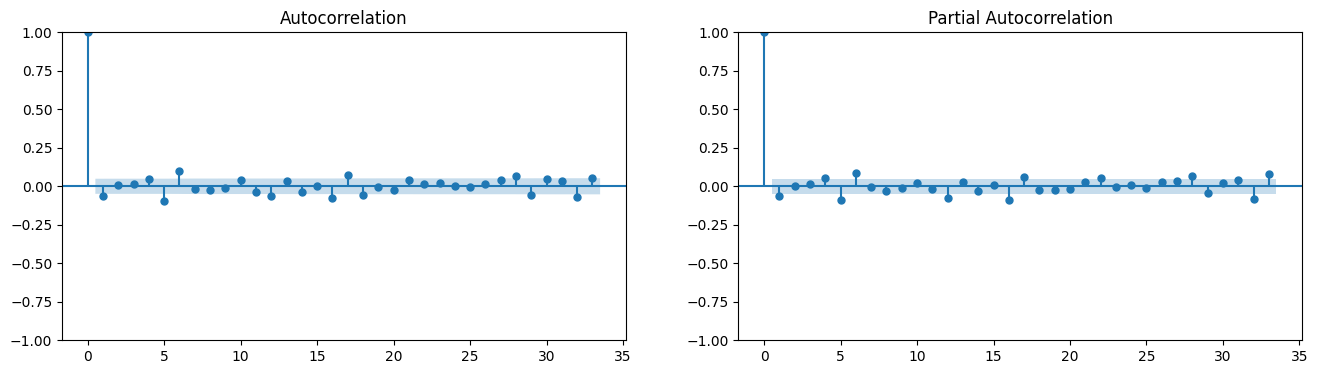

In [13]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Close_diff'].dropna(), ax=ax[0])
plot_pacf(df['Close_diff'].dropna(), ax=ax[1])
plt.show()


### 4.ARIMA Model devlopment:

In [14]:
# Determine
train = df['Close'][:-30]
test = df['Close'][-30:]

# Confirm sizes
print(f"Training size: {len(train)}")
print(f"Testing size: {len(test)}")


Training size: 1568
Testing size: 30


In [15]:
# Choose ARIMA(p,d,q) based on ACF/PACF
model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=30)
forecast_index = test.index

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



### 5.Model Evaluation:

In [16]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = mean_absolute_percentage_error(test, forecast)

print(f'\nModel Evaluation:\nRMSE: {rmse:.2f}, MAPE: {mape:.2%}')


Model Evaluation:
RMSE: 251.01, MAPE: 6.59%


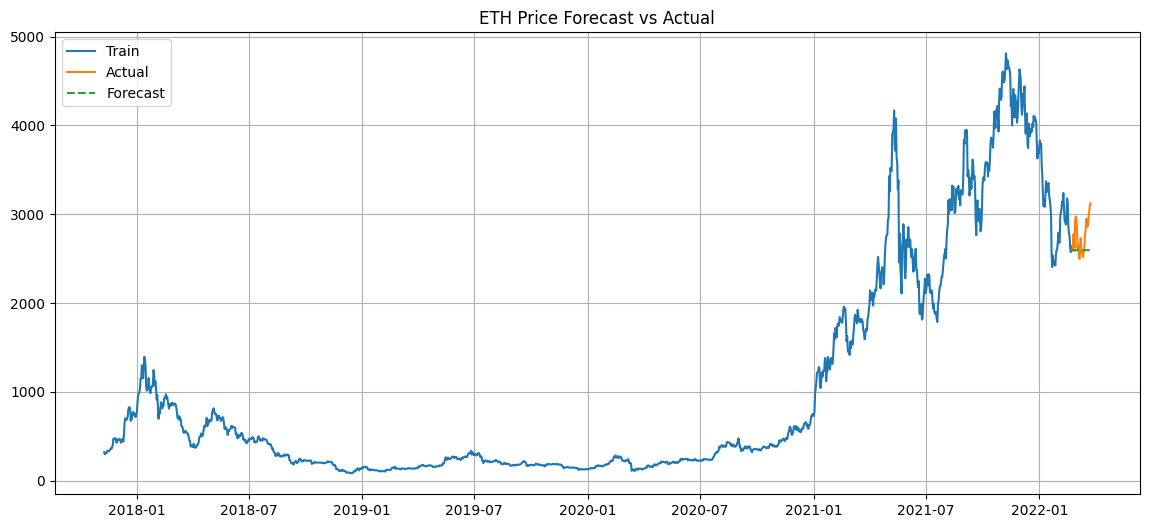

In [17]:
# Plot Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.title('ETH Price Forecast vs Actual')
plt.legend()
plt.grid(True)
plt.show()

### 6.Forcasting And Visulization:

In [18]:
model_full = ARIMA(df['Close'], order=(5,1,2))
model_full_fit = model_full.fit()
future_forecast = model_full_fit.get_forecast(steps=30)
future_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
forecast_df = future_forecast.conf_int()
forecast_df['Forecast'] = future_forecast.predicted_mean
forecast_df.index = future_index

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



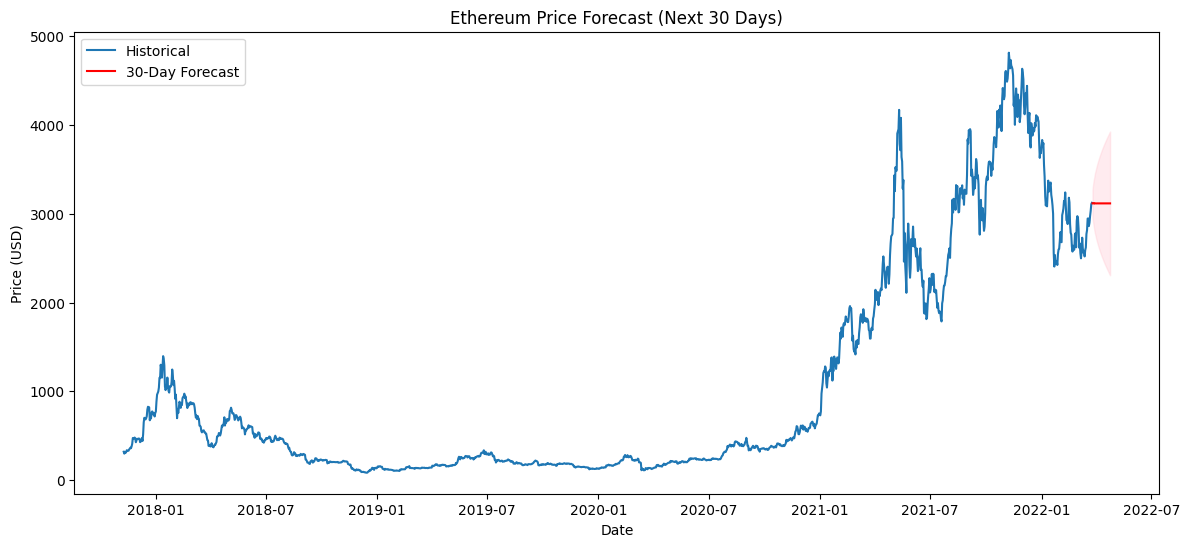

In [19]:
# Plot future forecast
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_df['Forecast'], label='30-Day Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['lower Close'], forecast_df['upper Close'], color='pink', alpha=0.3)
plt.title('Ethereum Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

In [20]:
# prompt: draw same in plotly # Plot future forecast
# plt.figure(figsize=(14, 6))
# plt.plot(df['Close'], label='Historical')
# plt.plot(forecast_df['Forecast'], label='30-Day Forecast', color='red')
# plt.fill_between(forecast_df.index, forecast_df['lower Close'], forecast_df['upper Close'], color='pink', alpha=0.3)
# plt.title('Ethereum Price Forecast (Next 30 Days)')
# plt.xlabel('Date')
# plt.ylabel('Price (USD)')
# plt.legend()

import plotly.graph_objects as go

fig = go.Figure()

# Add Historical data
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Historical'))

# Add 30-Day Forecast
fig.add_trace(go.Scatter(x=forecast_df.index, y=forecast_df['Forecast'], mode='lines', name='30-Day Forecast', line=dict(color='red')))

# Add confidence interval
fig.add_trace(go.Scatter(x=forecast_df.index.tolist() + forecast_df.index[::-1].tolist(),
                         y=forecast_df['upper Close'].tolist() + forecast_df['lower Close'][::-1].tolist(),
                         fill='toself',
                         fillcolor='pink',
                         line=dict(color='rgba(255,255,255,0)'),
                         hoverinfo="skip",
                         showlegend=False))


fig.update_layout(
    title='Ethereum Price Forecast (Next 30 Days)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)

fig.show()

In [21]:
# save the model
with open('arima_eth_pric_forcast.pkl', 'wb') as file:
    pickle.dump(model_full_fit, file)